In [1]:
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt
init_printing() 

###  Derivada  análitica con sympy

In [2]:
x = sp.symbols("x")
f = lambda x: sp.sin(x**2) + sp.log(x)
f(x)

In [3]:
fp = sp.diff(f(x),x, 1)
fp

In [4]:
fp(1)

TypeError: ignored

In [5]:
fp_ = sp.lambdify(x, fp, "numpy")
fp_(2)

Text(0, 0.5, "f'(x)")

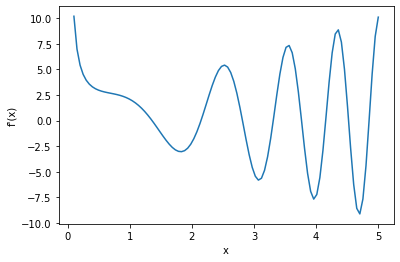

In [6]:
x_ = np.linspace(0.1, 5, 100)
plt.plot(x_, fp_(x_))
plt.xlabel("x")
plt.ylabel("f'(x)")

In [7]:
x_

array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0.34747475, 0.3969697 , 0.44646465, 0.4959596 , 0.54545455,
       0.59494949, 0.64444444, 0.69393939, 0.74343434, 0.79292929,
       0.84242424, 0.89191919, 0.94141414, 0.99090909, 1.04040404,
       1.08989899, 1.13939394, 1.18888889, 1.23838384, 1.28787879,
       1.33737374, 1.38686869, 1.43636364, 1.48585859, 1.53535354,
       1.58484848, 1.63434343, 1.68383838, 1.73333333, 1.78282828,
       1.83232323, 1.88181818, 1.93131313, 1.98080808, 2.03030303,
       2.07979798, 2.12929293, 2.17878788, 2.22828283, 2.27777778,
       2.32727273, 2.37676768, 2.42626263, 2.47575758, 2.52525253,
       2.57474747, 2.62424242, 2.67373737, 2.72323232, 2.77272727,
       2.82222222, 2.87171717, 2.92121212, 2.97070707, 3.02020202,
       3.06969697, 3.11919192, 3.16868687, 3.21818182, 3.26767677,
       3.31717172, 3.36666667, 3.41616162, 3.46565657, 3.51515152,
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262

In [8]:
derivative(f, 2, dx=1E-5)

In [9]:
x_ = np.linspace(0.1, 5, 100)
derivada = np.vectorize(derivative )



In [10]:
fpp = derivada(f, x_ , dx = 1E-5)
len(fpp)

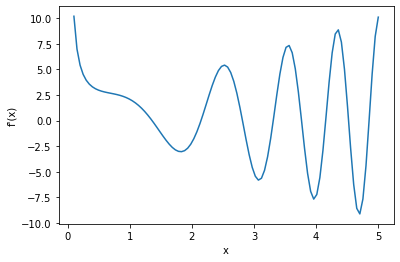

In [11]:
plt.figure()
plt.plot(x_,fpp)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.show()


Empleando la funcion derivative


In [12]:
from scipy import misc
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

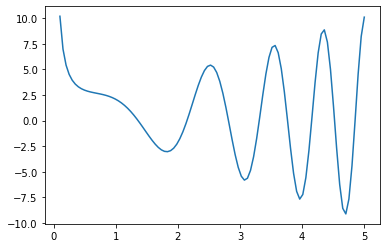

In [13]:
q = derivate(f, x_ , dx = 1E-5)
plt.plot(x_,q)

# Derivada num'erica 


# En un circuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:

1. Construya un data frame de pandas con los valores de tiempo y corriente 






In [14]:
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])
data = {"tiempo":t, "corriente":i}

df=pd.DataFrame(data)

In [15]:
df

,tiempo,corriente
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [16]:
df["tiempo"].values

array([1.  , 1.01, 1.02, 1.03, 1.04])

In [17]:
df.corriente[:-1]

0    3.10
1    3.12
2    3.14
3    3.18
Name: corriente, dtype: float64

In [18]:
df.corriente[1:]

1    3.12
2    3.14
3    3.18
4    3.24
Name: corriente, dtype: float64

In [19]:
deri = (df.corriente.values[1:]-df.corriente.values[:-1])/0.01

In [20]:
L = 0.98
R = 0.142
voltage = L * deri + R * df["corriente"][:-1]

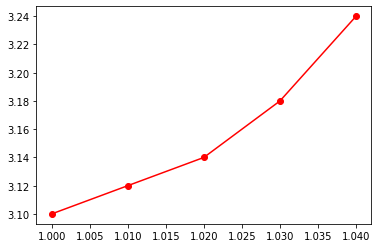

In [21]:
plt.plot(df.tiempo, df.corriente, "ro-")

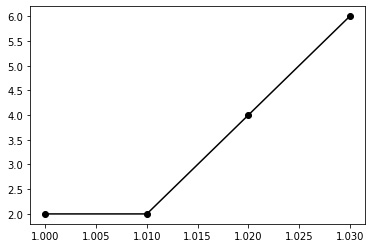

In [22]:
plt.plot(df.tiempo[:-1], deri, "ko-")

In [23]:
deri

array([2., 2., 4., 6.])

In [24]:
# https://numpy.org/doc/stable/reference/generated/numpy.diff.html
np.diff(df.corriente)/0.01

array([2., 2., 4., 6.])